# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [8]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]
ColorsII = []

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'

In [18]:
addressGev="./../CSCS_Results/kessence_cs2e6_w09/output/";
address_fld="./../CSCS_Results/fluid_gevolution_deltakess/";
# addressclass="./../class_cs_0_newt_high_precision/";

Gev_deltam_zall=[]
Gev_deltakess_zall=[]
Gev_phi_kess_zall=[]

Gev_fld_phi_zall=[]
Gev_fld_deltam_zall=[]
Gev_fld_deltkess_zall=[]

# class_delta_kess_zall=[]
# class_phi_kess_zall=[]

z_list=[ 100,10,6,1,0]
z_list_fld=[100, 10, 6, 1, 0]
maxNum=np.shape(z_list)[0]
for i in range (0,np.shape(z_list_fld)[0]):
    Gev_fld_phi_zall.append(np.loadtxt("./"+address_fld+"kess_pk_cs_e3_"+str(i).zfill(3)+"_phi.dat"))
    Gev_fld_deltam_zall.append(np.loadtxt("./"+address_fld+"kess_pk_cs_e3_"+str(i).zfill(3)+"_delta.dat"))
    Gev_fld_deltkess_zall.append(np.loadtxt("./"+address_fld+"kess_pk_cs_e3_"+str(i).zfill(3)+"_deltaclass.dat"))

for i in range (0,maxNum):
    Gev_phi_kess_zall.append(np.loadtxt("./"+addressGev+"kess_pk_cs_e3_"+str(i).zfill(3)+"_phi.dat"))
    Gev_deltam_zall.append(np.loadtxt("./"+addressGev+"/kess_pk_cs_e3_"+str(i).zfill(3)+"_delta.dat"))
    Gev_deltakess_zall.append(np.loadtxt("./"+addressGev+"/kess_pk_cs_e3_"+str(i).zfill(3)+"_delta_kess.dat"))

#     class_phi_kess_zall.append(np.loadtxt("./"+addressclass+"/class_kess_cs_e3_newt_z"+str(i+1).zfill(1)+"_tk.dat"))
#     class_delta_kess_zall.append(np.loadtxt("./"+addressclass+"/class_kess_cs_e3_newt_z"+str(i+1).zfill(1)+"_pk.dat"))
    
   

# Matter power Class vs Gevolution

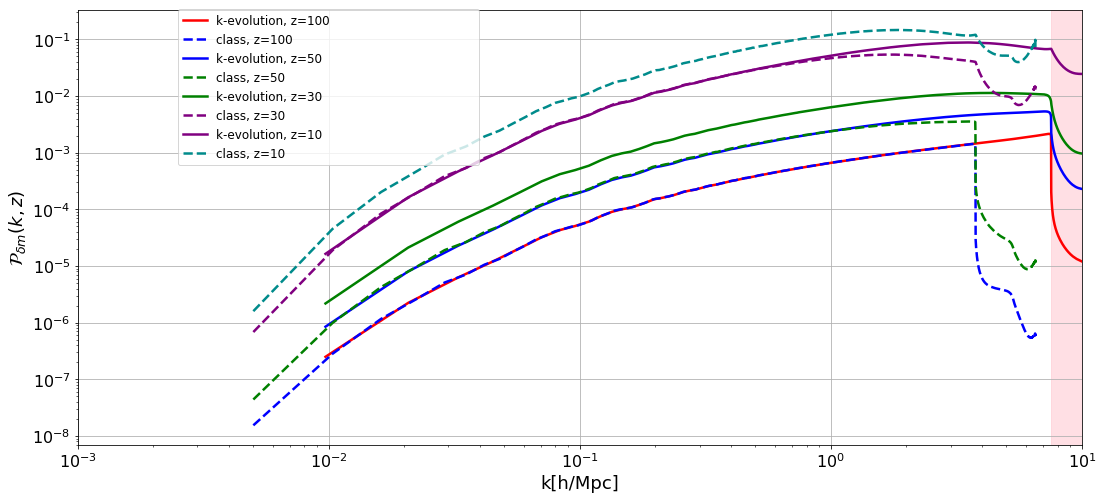

In [3]:

plt.figure(figsize=(18,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.figure(1)
for i in range (0,4):
# i=0
    plt.loglog(Gev_delta_kess_zall[i][:,0], Gev_delta_kess_zall[i][:,1],color=ColorsI[i],linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
    #     plt.loglog(class_phi_kess_zall[i][:,0], class_phi_kess_zall[i][:,0]**3 * class_delta_kess_zall[i][:,1]/(2. * np.pi**2),color=ColorsI[i],linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))
    plt.loglog(Gev_fld_delta_zall[i][:,0], Gev_fld_delta_zall[i][:,1],color=ColorsI[i+1],linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))

plt.axvspan(7.52, 14, alpha=0.5, color='pink')

plt.legend(bbox_to_anchor=(0.1, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P}_{\delta m}(k,z)$",fontsize=18)
plt.xlim(0.001,10)
# plt.ylim(2.e-5,100)
plt.grid(True)
plt.show()


# Phi power Class vs Gevolution

In [4]:
H_list=[]
Class_Phi_power_zall=[]
for i in range (0,maxNum):
    H_list.append(Hubble_conf_Mpc(1./(1.+z_list[i])))
    Class_Phi_power_zall.append(As*(class_phi_kess_zall[i][:,7])**2 *((class_phi_kess_zall[i][:,0]/kp)**(ns-1.)) );
np.shape(Class_Phi_power_zall)

NameError: name 'Hubble_conf_Mpc' is not defined

# delta_kess power Fluid vs k-evolution

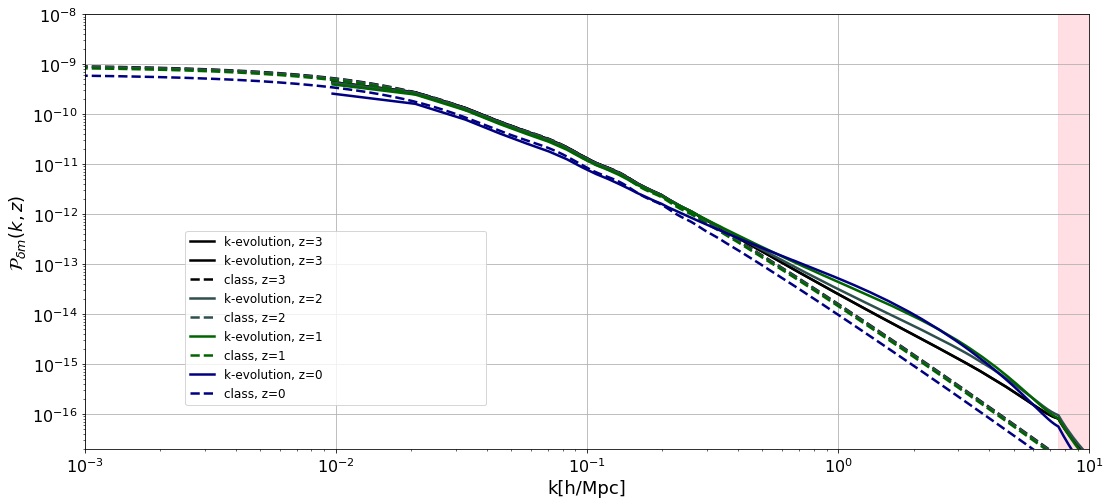

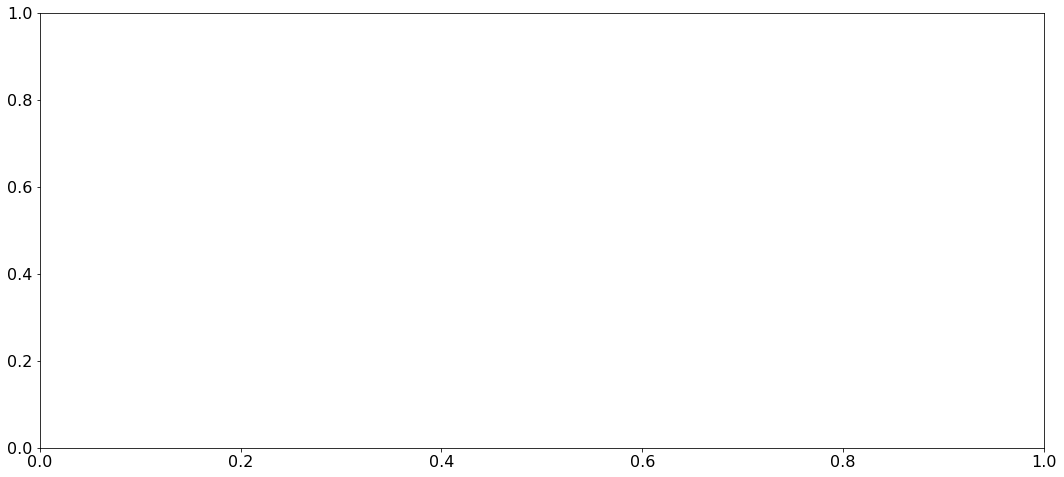

In [12]:
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-6;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
# Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
# Omega_m=Omega_b + Omega_cdm;
H_list=[]
Class_Phi_power_zall=[]
# for i in range (0,maxNum):
# #     H_list.append(Hubble_conf_Mpc(1./(1.+z_list[i])))
#     Class_Phi_power_zall.append(As*(class_phi_kess_zall[i][:,7])**2 *((class_phi_kess_zall[i][:,0]/kp)**(ns-1.)) );
    
plt.figure(figsize=(18,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.figure(1)
for i in range (maxNum-4,maxNum):
    plt.loglog(Gev_phi_kess_zall[i][:,0], Gev_phi_kess_zall[i][:,1],color=ColorsI[i],linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
    plt.loglog(class_phi_kess_zall[i][:,0], Class_Phi_power_zall[i][:],color=ColorsI[i],linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))
    
plt.axvspan(7.52, 14, alpha=0.5, color='pink')

plt.legend(bbox_to_anchor=(0.1, 0.40, 0.3, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P}_{\delta m}(k,z)$",fontsize=18)
plt.xlim(0.001,10)
plt.ylim(2.e-17,1.e-8)
plt.grid(True)
plt.show()


# |mu(k,z)|, K-evolution vs class

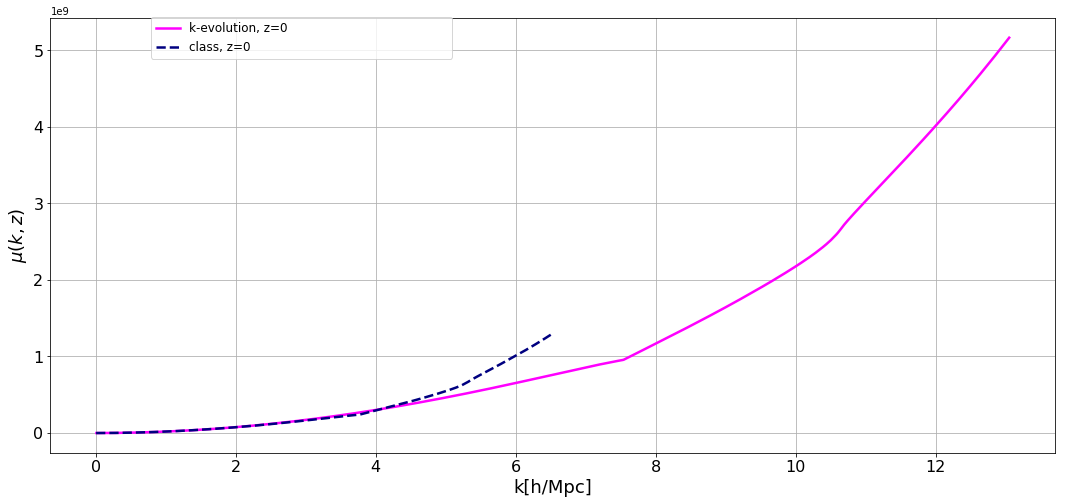

In [6]:
mu_class=[]
mu_kev=[]
plt.figure(figsize=(18,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.figure(1)
# for i in range (maxNum-1,maxNum):
    #|mu| =  k^2 sqrt(Pm/P_phi)
#     mu_class0=class_phi_kess_zall[i][:,0]**2 * np.abs(class_phi_kess_zall[i][:,6])/np.abs(class_phi_kess_zall[i][:,7] ) 
mu_class0= np.sqrt(Gev_fld_delta_zall[5][:,1]/Gev_fld_phi_zall[5][:,1] ) 
mu_class.append(mu_class0);
mu_kev0=  np.sqrt(Gev_delta_kess_zall[maxNum-1][:,1]/Gev_phi_kess_zall[maxNum-1][:,1] )
mu_kev.append(mu_kev0)
# plt.title(string)
# for i in range (0,2):
plt.plot(Gev_delta_kess_zall[maxNum-1][:,0], np.sqrt(Gev_delta_kess_zall[maxNum-1][:,1]/Gev_phi_kess_zall[maxNum-1][:,1] ),color=ColorsI[i+2],linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
plt.plot(Gev_fld_delta_zall[4][:,0], mu_class[0],color=ColorsI[i],linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))

plt.legend(bbox_to_anchor=(0.1, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mu(k,z)$",fontsize=18)
# plt.xlim(0.01,5.)
#     plt.ylim(2.e-14,1.e-7)
plt.grid(True)
plt.show()


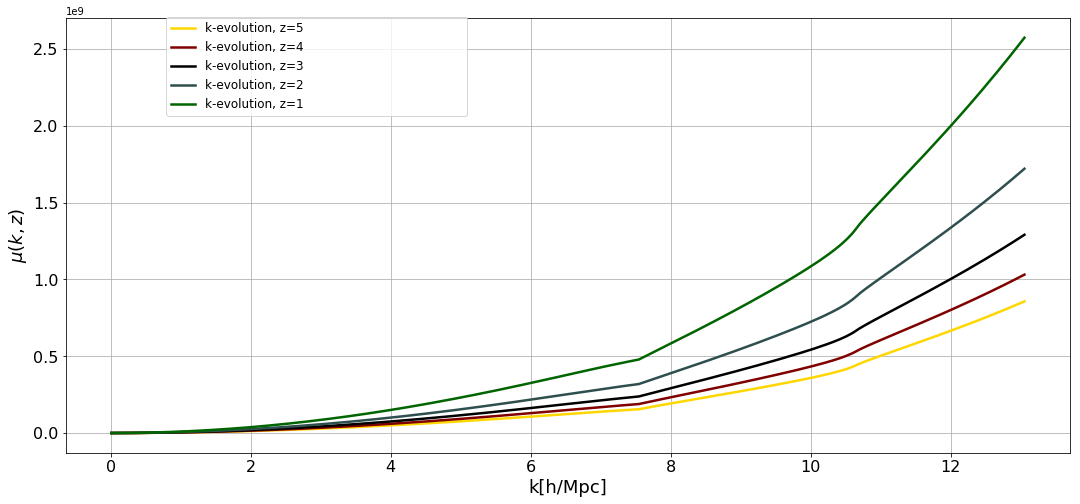

In [69]:
mu_class=[]
mu_kev=[]
plt.figure(figsize=(18,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.figure(1)
for i in range (0,maxNum):
    #|mu| =  k^2 sqrt(Pm/P_phi)
#     mu_class0=class_phi_kess_zall[i][:,0]**2 * np.abs(class_phi_kess_zall[i][:,6])/np.abs(class_phi_kess_zall[i][:,7] ) 
    mu_class0= np.abs(class_phi_kess_zall[i][:,6])/np.abs(class_phi_kess_zall[i][:,7] ) 
    mu_class.append(mu_class0);
    mu_kev0=  np.sqrt(Gev_delta_kess_zall[i][:,1]/Gev_phi_kess_zall[i][:,1] )
    mu_kev.append(mu_kev0)
# plt.title(string)
for i in range (5,maxNum):
    plt.plot(Gev_delta_kess_zall[i][:,0], mu_kev[i],color=ColorsI[i],linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
#     plt.plot(class_phi_kess_zall[i][:,0], mu_class[i],color=ColorsI[i],linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))

plt.legend(bbox_to_anchor=(0.1, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mu(k,z)$",fontsize=18)
# plt.xlim(0.01,5.)
#     plt.ylim(2.e-14,1.e-7)
plt.grid(True)
plt.show()


# Class mu interpolation on Kevolution k

In [45]:
class_mu_z_all=[]
for i in range(0,maxNum):
    interp_class_mu=(interp1d(class_phi_kess_zall[i][:,0],mu_class[i]) )
    class_mu_z_all.append(interp_class_mu(Gev_delta_kess_zall[i][:,0]) )

# |mu(k,z)|(K-ev)/ |mu(k,z)|(class)

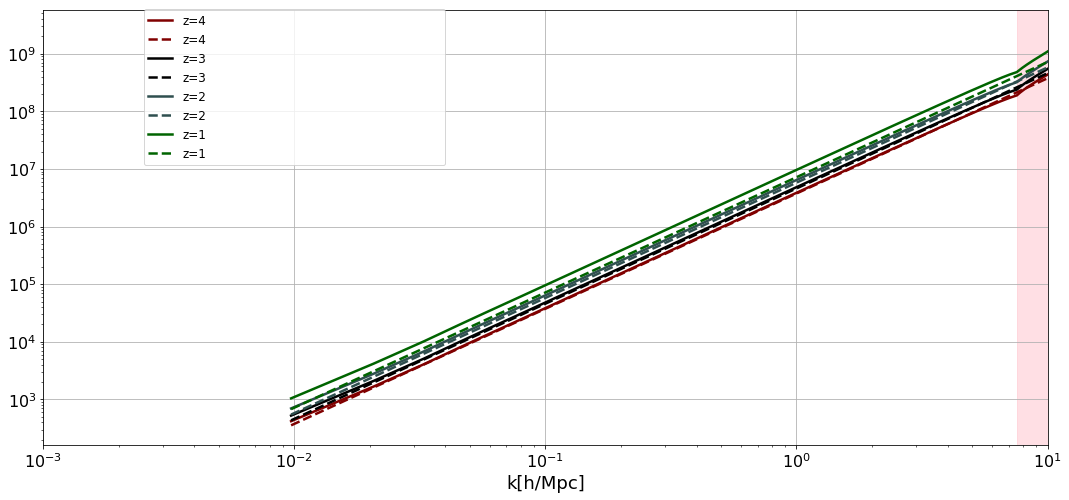

In [80]:
plt.figure(figsize=(18,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.figure(1)
# plt.title(string)
for i in range (maxNum-4,maxNum):
    #|mu| =  k^2 sqrt(Pm/P_phi)
    plt.loglog(Gev_delta_kess_zall[i][:,0], (mu_kev[i]),color=ColorsI[i],linestyle='solid',lw=2.5,  label=r"z="+str(z_list[i]))
    plt.loglog(Gev_delta_kess_zall[i][:,0], class_mu_z_all[i],color=ColorsI[i],linestyle='dashed',lw=2.5,  label=r"z="+str(z_list[i]))

    #     plt.loglog(Gev_delta_kess_zall[i][:,0], class_mu_z_all[i],color=ColorsI[i],linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))
#     plt.loglog(class_phi_kess_zall[i][:,0], mu_class[i],color=ColorsI[i],linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))
plt.axvspan(7.52, 14, alpha=0.5, color='pink')

plt.legend(bbox_to_anchor=(0.1, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
# plt.ylabel(r"$\frac{\mu(k,z)(kev)}{\mu(k,z)(class)}$",fontsize=18)
plt.xlim(0.001,10)
# plt.ylim(0,)
plt.grid(True)
plt.show()
